In [1]:
import os
import re
import pandas as pd
pd.set_option('display.max_rows', 100)
import numpy as np
import matplotlib.pyplot as plt
from utils import *

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
# File loading
df = pd.read_excel(r'..\..\Data\Customers.xlsx', 'Sheet1')
df.name = 'Customers'

In [3]:
# Dataframe head
df.head()

,Cust Sold To Nbr,Cust Sold To Name,Cust Sold To Country,C-07,C-06,C-05,C-04,C-03,C-02,C-01
0,28502952,CH de Libourne Robert Boulin,France,CH de Libourne - Robert Boulin,UniHA - Stérilisation,Groupement de Gironde,Regional Buying Group,Public Hospital,Hospital,Healthcare Europe
1,28502953,Cl Saint-Roch-Montpellier,France,OC Santé,Helpevia,Helpevia,National Buying Group,Private Hospital,Hospital,Healthcare Europe
2,28502955,Polyclinique de Gentilly,France,ELSAN,ELSAN NR,ELSAN,National Buying Group,Private Hospital,Hospital,Healthcare Europe
3,28502956,CH Alphonse Guérin - Ploërmel,France,Groupe Hospitalier Bretagne Sud,Groupe Hospitalier Bretagne Sud,Groupe Hospitalier Bretagne Sud,Regional Buying Group,Public Hospital,Hospital,Healthcare Europe
4,28502958,Clinique des Dômes,France,Medi-Ha,ELSAN NR,ELSAN,National Buying Group,Private Hospital,Hospital,Healthcare Europe


In [4]:
# Dataframe shape
df_shape = df.shape
print("This dataframe has %d columns and %d rows." % (df_shape[1], df_shape[0]))

This dataframe has 10 columns and 4830 rows.


In [4]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4830 entries, 0 to 4829
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cust Sold To Nbr      4830 non-null   int64 
 1   Cust Sold To Name     4830 non-null   object
 2   Cust Sold To Country  4830 non-null   object
 3   C-07                  4830 non-null   object
 4   C-06                  4830 non-null   object
 5   C-05                  4830 non-null   object
 6   C-04                  4830 non-null   object
 7   C-03                  4830 non-null   object
 8   C-02                  4830 non-null   object
 9   C-01                  4830 non-null   object
dtypes: int64(1), object(9)
memory usage: 377.5+ KB


In [5]:
# Categorical features modalities
df['Cust Sold To Nbr']=df['Cust Sold To Nbr'].astype(object)
modalities_table(df)

,Modalities
C-01,2
C-02,7
C-03,10
C-04,22
Cust Sold To Country,66
C-05,1176
C-06,1423
C-07,2645
Cust Sold To Name,4358
Cust Sold To Nbr,4830


There is 4358 customer dispatched in 66 country.

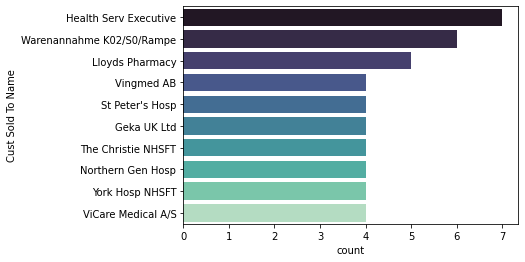

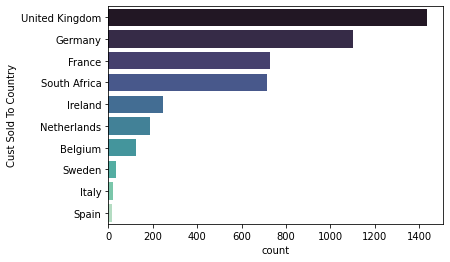

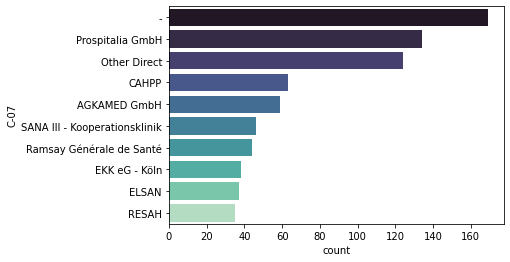

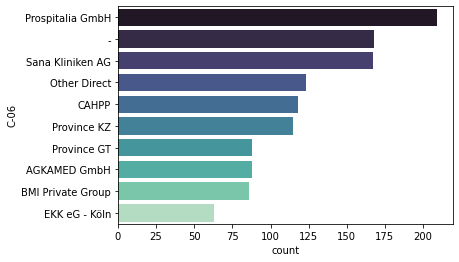

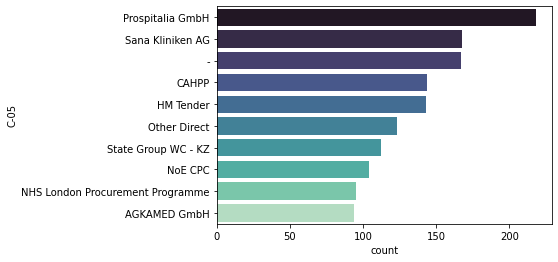

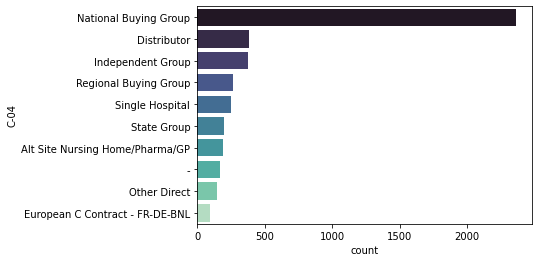

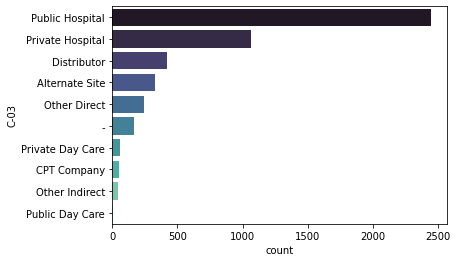

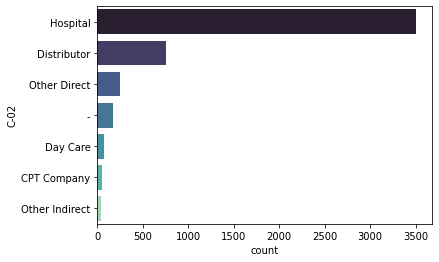

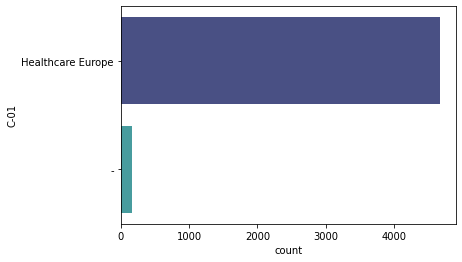

In [7]:
# Distribution of categorical columns        
plot_cat_dist_h(df)

In [8]:
# Missing values are represented by "-"
df[df.eq('-').any(1)]

,Cust Sold To Nbr,Cust Sold To Name,Cust Sold To Country,C-07,C-06,C-05,C-04,C-03,C-02,C-01
199,28503339,AHO - Clinique Saint-Augustin,France,-,-,-,-,-,-,-
200,28503375,Hopitaux Civils - CAMPS,France,-,-,-,-,-,-,-
250,28511598,Southern Syringe Services Ltd,United Kingdom,-,-,-,-,-,-,-
251,28511600,Bunzl New Front. HS Interlink,United Kingdom,-,-,-,-,-,-,-
276,28515838,Halyard Health,United Kingdom,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...
3329,28802763,Beaufort West Hospital,South Africa,-,-,-,-,-,-,-
3333,28802774,TL Setati,South Africa,-,-,-,-,-,-,-
3339,28802790,WC Health Mosselbaai Hospital,South Africa,-,-,-,-,-,-,-
3585,28803791,Clonallon Laboratories Limited,United Kingdom,-,-,Clonallon Laboratories Limited,CPT Company,CPT Company,CPT Company,Healthcare Europe


In [9]:
# Replacing missing values with Unknown
df.replace({'-': 'Unknown'},inplace=True)

In [10]:
df[(df['C-01'].isnull()) & ((df['C-02'].notnull())|(df['C-03'].notnull())|
                            (df['C-04'].notnull())|(df['C-05'].notnull())|
                            (df['C-06'].notnull())|(df['C-07'].notnull()))]

,Cust Sold To Nbr,Cust Sold To Name,Cust Sold To Country,C-07,C-06,C-05,C-04,C-03,C-02,C-01


In [11]:
# Missing value summary
missing_values_table(df)

Your selected dataframe has 10 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [12]:
# Missing values export
save_missing_values_table(df, df.name)

In [6]:
# Categorical features modalities
modalities_table(df, True)

,Modalities
C-01,2
C-02,7
C-03,10
C-04,22
Cust Sold To Country,66
C-05,1176
C-06,1423
C-07,2645
Cust Sold To Name,4358
Cust Sold To Nbr,4830


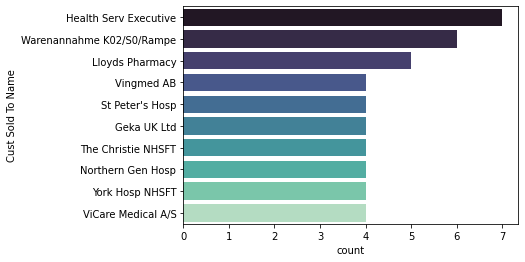

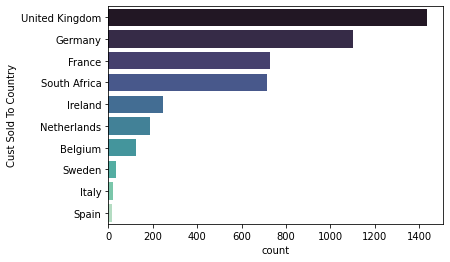

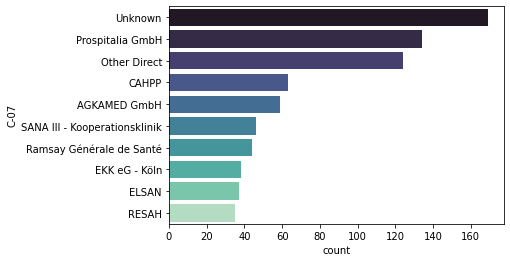

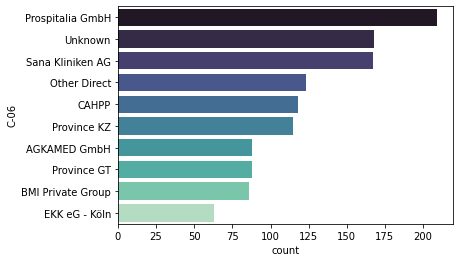

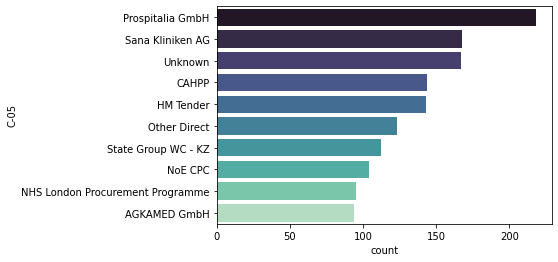

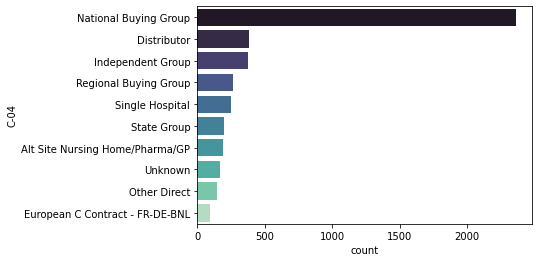

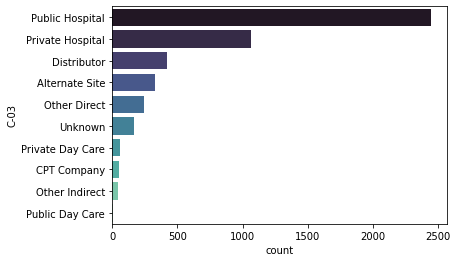

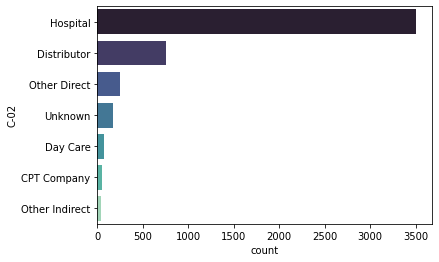

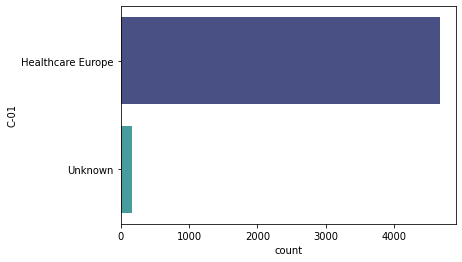

In [14]:
# Distribution of categorical columns        
plot_cat_dist_h(df)

The largest clients are:</br>
- **Health Serv Executive**
- **Warenannahme K02/S0/Rampe**
- **Llyods Pharmacy**

The countries with most customers are : </br>
- **United Kingdom**
- **Germany**
- **France**
- **South Africa**</br>

Most customers are **public hospitals**.

In [15]:
countries = sorted(list(set(df.iloc[:,2])))
df_countries = pd.DataFrame(countries, columns=['Country'])
df_countries

,Country
0,Aruba
1,Austria
2,Bahrain
3,Belgium
4,Botswana
5,Bulgaria
6,"Congo, (Congo  Kinshasa)"
7,Croatia
8,Cyprus
9,Czech Republic


In [16]:
# This value should be changed to "Congo"
df_countries[df_countries['Country'].str.contains(r'Congo.*')]

,Country
6,"Congo, (Congo  Kinshasa)"


<AxesSubplot:>

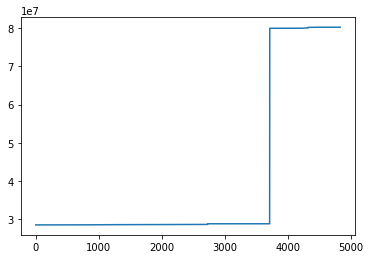

In [17]:
df['Cust Sold To Nbr'].plot()

In [18]:
# There is a sudden change in customer ID in 3711 row
df.iloc[3709:3714]

,Cust Sold To Nbr,Cust Sold To Name,Cust Sold To Country,C-07,C-06,C-05,C-04,C-03,C-02,C-01
3709,28804291,TIVERTON & DISTRICT HOSP,United Kingdom,TIVERTON & DISTRICT HOSP,Royal Devon & Exeter NHSFT,Peninsula PSA,National Buying Group,Public Hospital,Hospital,Healthcare Europe
3710,28804298,Ngwhaneinvestment and Projects,South Africa,Ngwhaneinvestment and Projects,Distributor C Contract,RSA - Distributor C Contract,State Group,Public Hospital,Hospital,Healthcare Europe
3711,80000104,ArcRoyal Ltd,Ireland,ArcRoyal Ltd,ArcRoyal Ltd,ArcRoyal Ltd,CPT Company,CPT Company,CPT Company,Healthcare Europe
3712,80000107,Crosstec GmbH,Austria,Crosstec GmbH,Crosstec GmbH,Crosstec GmbH,Distributor,Distributor,Distributor,Healthcare Europe
3713,80000110,Hospithera,Belgium,Hospithera,Hospithera,Hospithera,Distributor,Distributor,Distributor,Healthcare Europe


In [19]:
for c in df.select_dtypes(['object']).columns:
    print(c + ' VARCHAR(%d),' % max(df[c].str.len()))

Cust Sold To Name VARCHAR(40),
Cust Sold To Country VARCHAR(25),
C-07 VARCHAR(35),
C-06 VARCHAR(35),
C-05 VARCHAR(35),
C-04 VARCHAR(31),
C-03 VARCHAR(16),
C-02 VARCHAR(14),
C-01 VARCHAR(17),


## The customer dimension should be in this schema :
<br/>
[ID] [int] IDENTITY(1,1) NOT NULL,<br/>
[customer_ID] [int] NOT NULL,<br/>
[customer_name] [varchar](40) NOT NULL,<br/>
[C01] [varchar](17) NULL,<br/>
[C02] [varchar](14) NULL,<br/>
[C03] [varchar](16) NULL,<br/>
[C04] [varchar](31) NULL,<br/>
[C05] [varchar](35) NULL,<br/>
[C06] [varchar](35) NULL,<br/>
[C07] [varchar](35) NULL,<br/>
[country_ID] [int] NOT NULL ##VARCHAR(25)